# Setting Up
- install font
https://github.com/adobe-fonts/source-han-code-jp/releases/tag/2.000R

- LaTeX command reference 
http://www.latex-cmd.com/

# Machine Learning Online Class - Exercise 2: Logistic Regression

##  Instructions

This file contains code that helps you get started on the logistic regression exercise.  
You will need to complete the following functions in this exericse:

- sigmoid.m
- costFunction.m
- predict.m
- costFunctionReg.m

For this exercise, you will not need to change any code in this file, or any other files other than those mentioned above.

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt, rcParams
import pandas as pd
from scipy import special, optimize
import numpy as np

# Load Data
The first two columns contains the exam scores and the third column contains the label.


In [21]:
df = pd.read_csv("./ex2data1.txt", names=['score1', 'score2', 'admitted'])
df.head()

,score1,score2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [22]:
X = df.as_matrix(["score1","score2"])
y = df.as_matrix(["admitted"])

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (100, 2)
y.shape:  (100, 1)


# Part 1: Plotting - plotData(X, y)

We start the exercise by first plotting the data to understand the problem we are working with.

xlabel('Exam 1 score')
ylabel('Exam 2 score')
legend('Admitted', 'Not admitted')

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


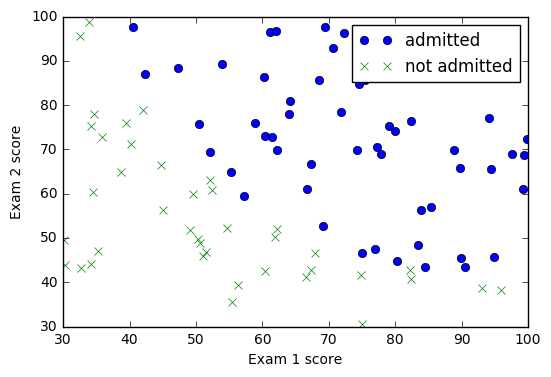

In [23]:
#   We start the exercise by first plotting the data to understand the problem we are working with.
print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

def plot_data(X, y):
    ''' ====================== YOUR CODE HERE ======================
    Instructions: Plot the positive and negative examples on a 2D plot, 
    using the option 'o' for the positive examples and 'x' for the negative examples.
    '''

    #  Find Indices of Positive and Negative Examples
    pos = X[(y==1)[:, 0]] # (y==1)[:, 0]  :convert (m, 1) matrix to index array: (m, )
    neg = X[(y==0)[:,0]]

    plt.plot(pos[:, 0], pos[:, 1], "o", label=u'admitted')
    plt.plot(neg[:, 0], neg[:, 1], "x", label=u'not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()


# call this function
plot_data(X, y)

# 1.2 Impletementation
## 1.2.1 Warm upexercise: sigmoid function


\begin{align}
h_\theta(x)=g(\theta^Tx)
\end{align}

where function g is the sigmoid function. The sigmoid function is defined as:

\begin{align}
g(x)=\frac{1}{(1+\mathrm{e}^{-x})}
\end{align}

Your first step is to implement this function in sigmoid.m so it can be called by the rest of your program. When you are finished, try testing a few values by calling sigmoid(x) at the Octave/MATLAB command line. For large positive values of x, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating sigmoid(0) should give you exactly 0.5. Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print(sigmoid(0)) # scalar
print(sigmoid(np.array([100, 0, 1.5, 0.1 , -5 ], dtype='f'))) # vector 
print(sigmoid(np.array([np.array([100, 0, 1.5, 0.1 , -5 ], dtype='f'),np.array([100, 0, 1.5, 0.1 , -5 ], dtype='f')]))) # matrix

0.5
[ 1.          0.5         0.81757444  0.52497917  0.00669285]
[[ 1.          0.5         0.81757444  0.52497917  0.00669285]
 [ 1.          0.5         0.81757444  0.52497917  0.00669285]]


## 1.2.2 Cost function and gradient

Now you will implement the cost function and gradient for logistic regression. Complete the code in costFunction.m to return the cost and gradient.

Recall that the cost function in logistic regression is


\begin{align}
J(\theta) = \frac{1}m \sum_{i=1}^m [ - y^{(i)} log(h_\theta(x^{(i)}))- (1- y^{(i)}) log(1 - h_\theta(x^{(i)}))]
\end{align}


and the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0,1,...,n) is defined as follows:

\begin{align}
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}m \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
\end{align}

# Part 2: Compute Cost and Gradient

In this part of the exercise, you will implement the cost and gradient for logistic regression. 


In [25]:
'''
====================== YOUR CODE HERE ======================
Instructions: Compute the cost of a particular choice of theta.
You should set J to the cost.
Compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta

Note: grad should have the same dimensions as theta
'''

def cost_function(theta, X, y):
    """
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the parameter for logistic regression 
    and the gradient of the cost w.r.t. to the parameters.
    """
    m = y.shape[0] # number of training examples
    if len(theta.shape) == 1:
        theta = theta[:, np.newaxis]
    hx = sigmoid(X.dot(theta))

    
    '''
    print('init_theta: ', theta.shape)
    print('X: ', X.shape)
    print("hx shape", hx.shape)
    print("y shape", y.shape)
    print("theta shape", theta.shape)
    '''
    J = (1/m) * ( - np.dot(y.T, np.log(hx)) - np.dot((1 - y).T, np.log(1 - hx)))
#     print('J', J.shape)
    return J.flatten()

def gradient_descent(theta, X, y):
    m = y.shape[0] # number of training examples
    hx = sigmoid(X.dot(theta))
    grad = (1/m) * X.T.dot((hx -  y))
#     print('grad', grad.shape)
    return grad.flatten() # return must be a vector , admitting to bfgc
    

#  Setup the data matrix appropriately, and add ones for the intercept term
(m, n) = X.shape

# Add intercept term to x and X_test
ones = np.ones(shape=(m, 1))
X_i = np.concatenate((ones,  X), axis=1)
print("X_i: " ,X_i.shape)
# Initialize fitting parameters
initial_theta = np.zeros(shape=(n + 1, 1))

# Compute and display initial cost and gradient
cost = cost_function(initial_theta, X_i, y)
grad = gradient_descent(initial_theta, X_i, y)

print('Cost at initial theta (zeros): {0}'.format(cost))
print('Gradient at initial theta (zeros): ', grad)

X_i:  (100, 3)
Cost at initial theta (zeros): [ 0.69314718]
Gradient at initial theta (zeros):  [ -0.1        -12.00921659 -11.26284221]


# 1.2.3 Learning parameters using fminunc

In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradent descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use an Octave/- MATLAB built-in function called fminunc.

Octave/MATLAB’s fminunc is an optimization solver that finds the min- imum of an unconstrained2 function. For logistic regression, you want to optimize the cost function J(θ) with parameters θ.
Concretely, you are going to use fminunc to find the best parameters θ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to fminunc the following inputs:

- The initial values of the parameters we are trying to optimize.
- A function that, when given the training set and a particular θ, computes the logistic regression cost and gradient with respect to θ for the dataset (X, y)

In ex2.m, we already have code written to call fminunc with the correct arguments.

In [26]:
def map_feature(X1, X2):
    '''
    MAPFEATURE Feature mapping function to polynomial features
    MAPFEATURE(X1, X2) maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
        X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    
    Inputs X1, X2 must be the same size
    '''
    
    degree = 6
    out = np.ones((X1.shape[0], 1))

    for i in range(1, degree):
        for j in  range(0, i):
            n = np.power(X1, i - j) * np.power(X2, j)
            out = np.hstack((out, n))
    return out

# Part 3: Optimizing using fminunc 

In this exercise, you will use a built-in function (fminunc) to find the optimal parameters theta.

Cost at theta found by fminunc: [ nan]
theta: [   6.28160472  754.37095671  707.48666327]


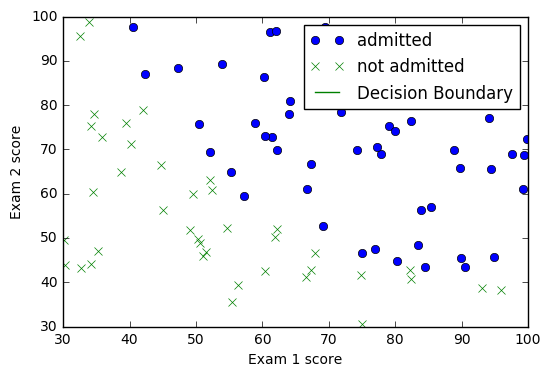

In [27]:
def plot_decision_boundary(theta, X, y):
    '''
    PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with the decision boundary defined by theta
    PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with o for the positive examples and x for the negative examples. 

    X is assumed to be a either     
    1) Mx3 matrix, where the first column is an all-ones column for the intercept.
    2) MxN, N>3 matrix, where the first column is all-ones    
    '''
    
    plot_data(X[:,(1,2)], y)
    
    if (X.shape[1] <= 3):
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:,1])-2,  np.max(X[:,1])+2])

        # Calculate the decision boundary line
        plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
                
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, '-g', label='Decision Boundary')    
        plt.legend()
        plt.axis([30, 100, 30, 100])

    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, num=50)
        v = np.linspace(-1, 1.5, num=50)

        z = np.zeros((u.size, v.size))

        # Evaluate z = theta*x over the grid
        for i in range(1, u.size):
            for j in range(1, v.size):
                z[i, j] = map_feature(u[i], v[j]) * theta

        z = z.T #important to transpose z before calling contour
        
        # contour(u, v, z, [0, 0], 'LineWidth', 2)        
        plt.contour(u, v, z)        #  http://ailaby.com/contour/
        plt.show()


# Run fminunc to obtain the optimal theta 
cf = lambda t: cost_function(t, X_i, y)
grad = lambda t: gradient_descent(t, X_i, y)

# res = optimize.minimize(cf, initial_theta, method='BFGS', jac=grad, options={'maxiter': 400})
res = optimize.minimize(cf, initial_theta,  options={'maxiter': 400})

# Print theta to screen
print('Cost at theta found by fminunc: {0}'.format(res.fun))
print('theta:', res.x)
theta = res.x

# Plot Boundary
plot_decision_boundary(theta, X_i, y)


# Part 4: Predict and Accuracies
After learning the parameters, you'll like to use it to predict the outcomes on unseen data. 
In this part, you will use the logistic regression model to predict the probability that a student with score 45 on exam 1 and score 85 on exam 2 will be admitted.

Furthermore, you will compute the training and test set accuracies of our model.

Your task is to complete the code in predict.m

Predict probability for a student with score 45 on exam 1 and score 85 on exam 2 


In [28]:
def predict(theta_cv, X):
    '''
    PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    '''
    
    m = X_i.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros((m, 1))
    
    '''
    ====================== YOUR CODE HERE ======================
    Instructions: Complete the following code to make predictions using your learned logistic regression parameters. 
        You should set p to a vector of 0's and 1's
    '''

    return sigmoid(np.dot(X, theta_cv)) >= 0.5


'''
numpy distinguish vector from matrix 
so you have to adjust shpae to caluculate inner product.
cf) http://sucrose.hatenablog.com/entry/2013/03/16/162019
'''
sample_rv = np.array([1, 45, 85], ndmin=2) # (1 3) row vector
theta_cv = np.array(theta, ndmin=2).T   # (3 1) column vector

prob = sigmoid(np.dot(sample_rv, theta_cv))
print("For a student with scores 45 and 85, we predict an admission probability of {0}".format(prob.flatten()))

# Compute accuracy on our training set
p = predict(theta_cv, X_i) # (True == 1 / False == 0)

print('Train Accuracy: {0}'.format(np.mean(p == y) * 100))

For a student with scores 45 and 85, we predict an admission probability of [ 1.]
Train Accuracy: 60.0
